#### Cargamos las librerias

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Cargamos los datos del CSV inventado

In [2]:
archivo_datos = r"C:\Users\Usuario\OneDrive\Python\000Curso Machine Learning - Python\Librerias_Machine_learning\Modelos de regresion\Tarea 5 - regresion lineal\dataset_regresion_lineal.csv"
df_datos = pd.read_csv(archivo_datos)
print(df_datos.head)

<bound method NDFrame.head of      Horas_Estudio  Edad   Materia_Estudio  Rendimiento
0               37    52            Python          159
1               95    24  Machine Learning          306
2               73    28            Python          224
3               59    64            Python          201
4               15    50  Machine Learning          132
..             ...   ...               ...          ...
195             34    66            Python          153
196             72    62            Python          237
197             89    41    Bases de Datos          287
198             88    57    Bases de Datos          273
199             77    57             Redes          222

[200 rows x 4 columns]>


#### Asignamos a 'X' la variable independiente y asignamos a 'y' la variable objetivo o target

In [3]:
X = df_datos [['Horas_Estudio']]
y = df_datos['Rendimiento']

#### graficamos la nube de puntos de los datos

Text(0, 0.5, 'Rendimiento')

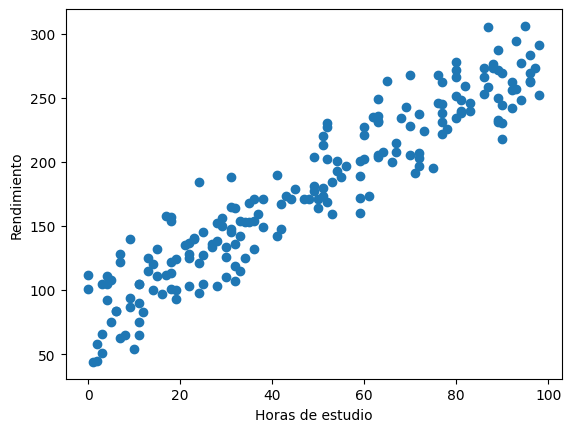

In [4]:
#nube de puntos de los datos
plt.scatter(X,y)
plt.xlabel("Horas de estudio")
plt.ylabel("Rendimiento")

#### entrenamos el modelo y representamos la línea de ajuste o línea de predicción

C:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


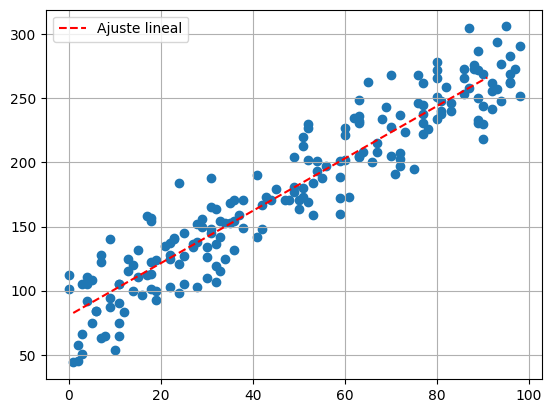

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train,y_train)

ajuste_de_X=np.arange(1,100,10)

ajuste_de_X=np.transpose([ajuste_de_X])

y_pred = lr.predict(ajuste_de_X)

plt.scatter(X,y)
plt.plot(ajuste_de_X,y_pred,label="Ajuste lineal",linestyle='--',color='Red')
plt.legend()
plt.grid(True)

#### entrenamos el modelo polinomico (4)y representamos la curva de ajuste o curva de predicción

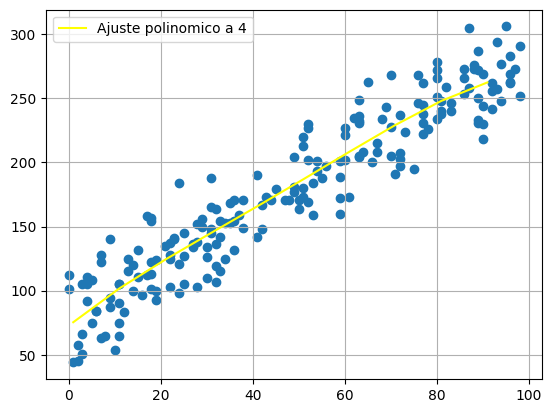

In [10]:
 #creamos curva con PolynomialFeatures a 4
 
curva = PolynomialFeatures(degree=4)

X_curva = curva.fit_transform(X_train)

pr0 =LinearRegression().fit(X_curva, y_train)
y_curva=pr0.predict(curva.fit_transform(ajuste_de_X))

plt.scatter(X,y)
plt.plot(ajuste_de_X,y_curva,label="Ajuste polinomico a 4",color='yellow')
plt.legend()
plt.grid(True)

#### calculamos el error cuadratico y el coeficiente de determinación de cada modelo

In [12]:
#Evalucion de la precision del modelo LINEAL
y_tr_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_tr_pred)
mse = mean_squared_error(y_test, y_tr_pred)

print("\033[1;31m"+f"Coeficiente de determinación modelo lineal: {r2:.2f}" + "\033[0;m")
print("\033[1;31m"+f"Error cuadrático medio modelo lineal: {mse:.2f}"+ "\033[0;m")
print('\n')


#Evalucion de la precision del modelo Polinomico
y_tra_pred = pr0.predict(curva.transform(X_test))

r2_poly = r2_score(y_test, y_tra_pred)
mse_poly = mean_squared_error(y_test, y_tra_pred)

print("\033[1;33m"+f"Coeficiente de determinación polinomico a 4: {r2_poly:.2f}"+"\033[0;m")
print("\033[1;33m"+f"Error cuadrático medio modelo polinomico a 4: {mse_poly:.2f}"+"\033[0;m")

plt.show()

Coeficiente de determinación modelo lineal: 0.92
Error cuadrático medio modelo lineal: 301.13


Coeficiente de determinación polinomico a 4: 0.92
Error cuadrático medio modelo polinomico a 4: 315.27


C:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(
